In [49]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from matplotlib.dates import date2num
from math import ceil

%matplotlib inline

In [2]:
df = pd.read_csv('data/simulated-data.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   added_date          10000 non-null  object 
 1   estimated_duration  10000 non-null  int64  
 2   start_date          9800 non-null   object 
 3   end_date            9700 non-null   object 
 4   real_duration       9700 non-null   float64
 5   returns             9800 non-null   float64
 6   software            10000 non-null  object 
 7   dev                 9800 non-null   object 
 8   squad               10000 non-null  object 
 9   client              10000 non-null  object 
 10  status              10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [4]:
df.head()

,added_date,estimated_duration,start_date,end_date,real_duration,returns,software,dev,squad,client,status
0,2016-10-07,20,2017-01-03,2017-01-27,19.0,0.0,G,Ana Clara,Kappa,Rezende,Concluído
1,2016-10-11,5,2017-01-05,2017-01-09,3.0,0.0,E,Helena,Kappa,Nogueira,Concluído
2,2016-10-11,1,2017-01-06,2017-01-06,1.0,0.0,A,Brenda,Epsilon,Costa S/A,Concluído
3,2016-10-14,17,2017-01-02,2017-01-23,16.0,0.0,E,Helena,Kappa,Araújo,Concluído
4,2016-10-14,12,2017-01-10,2017-01-20,9.0,2.0,D,Emanuelly,Theta,Nogueira,Concluído


In [5]:
# added_date
df['added_date'] = pd.to_datetime(df['added_date'])
# start_date
df['start_date'] = pd.to_datetime(df['start_date'])
# end_date
df['end_date'] = pd.to_datetime(df['end_date'])

In [6]:
# convert real_duration and returns to Int64
df[['real_duration', 'returns']] = df[['real_duration', 'returns']].astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   added_date          10000 non-null  datetime64[ns]
 1   estimated_duration  10000 non-null  int64         
 2   start_date          9800 non-null   datetime64[ns]
 3   end_date            9700 non-null   datetime64[ns]
 4   real_duration       9700 non-null   Int64         
 5   returns             9800 non-null   Int64         
 6   software            10000 non-null  object        
 7   dev                 9800 non-null   object        
 8   squad               10000 non-null  object        
 9   client              10000 non-null  object        
 10  status              10000 non-null  object        
dtypes: Int64(2), datetime64[ns](3), int64(1), object(5)
memory usage: 879.0+ KB


In [8]:
df.head()

,added_date,estimated_duration,start_date,end_date,real_duration,returns,software,dev,squad,client,status
0,2016-10-07,20,2017-01-03,2017-01-27,19,0,G,Ana Clara,Kappa,Rezende,Concluído
1,2016-10-11,5,2017-01-05,2017-01-09,3,0,E,Helena,Kappa,Nogueira,Concluído
2,2016-10-11,1,2017-01-06,2017-01-06,1,0,A,Brenda,Epsilon,Costa S/A,Concluído
3,2016-10-14,17,2017-01-02,2017-01-23,16,0,E,Helena,Kappa,Araújo,Concluído
4,2016-10-14,12,2017-01-10,2017-01-20,9,2,D,Emanuelly,Theta,Nogueira,Concluído


In [9]:
df_alt = df.dropna()

In [10]:
df_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9700 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   added_date          9700 non-null   datetime64[ns]
 1   estimated_duration  9700 non-null   int64         
 2   start_date          9700 non-null   datetime64[ns]
 3   end_date            9700 non-null   datetime64[ns]
 4   real_duration       9700 non-null   Int64         
 5   returns             9700 non-null   Int64         
 6   software            9700 non-null   object        
 7   dev                 9700 non-null   object        
 8   squad               9700 non-null   object        
 9   client              9700 non-null   object        
 10  status              9700 non-null   object        
dtypes: Int64(2), datetime64[ns](3), int64(1), object(5)
memory usage: 928.3+ KB


In [11]:
# df_alt.to_csv('data/simulated-data-alt.csv')

In [12]:
df['end_date_month'] = df['end_date'].dt.month.astype('Int64')

In [13]:
df.query('end_date >= "2017-01-01" and end_date < "2017-02-01"')

,added_date,estimated_duration,start_date,end_date,real_duration,returns,software,dev,squad,client,status,end_date_month
0,2016-10-07,20,2017-01-03,2017-01-27,19,0,G,Ana Clara,Kappa,Rezende,Concluído,1
1,2016-10-11,5,2017-01-05,2017-01-09,3,0,E,Helena,Kappa,Nogueira,Concluído,1
2,2016-10-11,1,2017-01-06,2017-01-06,1,0,A,Brenda,Epsilon,Costa S/A,Concluído,1
3,2016-10-14,17,2017-01-02,2017-01-23,16,0,E,Helena,Kappa,Araújo,Concluído,1
4,2016-10-14,12,2017-01-10,2017-01-20,9,2,D,Emanuelly,Theta,Nogueira,Concluído,1
...,...,...,...,...,...,...,...,...,...,...,...,...
224,2017-01-06,2,2017-01-20,2017-01-20,1,0,D,Emanuelly,Theta,Farias,Concluído,1
230,2017-01-09,13,2017-01-12,2017-01-27,12,1,D,Valentina,Theta,Barros,Concluído,1
243,2017-01-13,1,2017-01-31,2017-01-31,1,0,D,Agatha,Theta,Jesus Costa e Filhos,Concluído,1
246,2017-01-13,11,2017-01-18,2017-01-27,8,3,C,Maria Eduarda,Zeta,Oliveira,Concluído,1


In [14]:
df2 = df.copy()

In [15]:
df2['end_date'] = pd.to_datetime(df2['end_date'], format="%Y-%m")

In [16]:
df['end_year'] = df['end_date'].dt.year.astype('Int64')

In [17]:
group = df.groupby(['end_year'], as_index=False)['status'].count()

In [18]:
group

,end_year,status
0,2017,1591
1,2018,1700
2,2019,1653
3,2020,1670
4,2021,1683
5,2022,1396
6,2023,7


In [19]:
group = group.query('status > 7')

<AxesSubplot:xlabel='end_year', ylabel='status'>

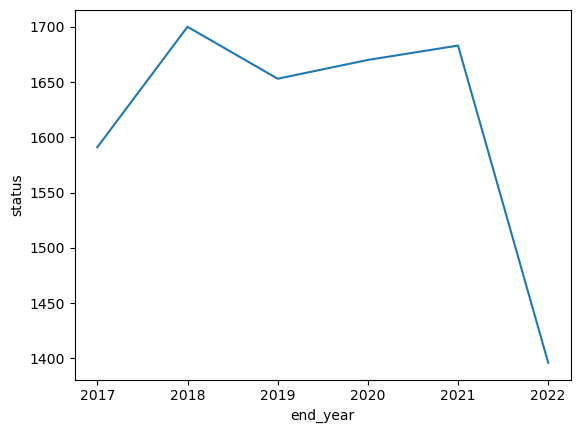

In [20]:
sns.lineplot(data=group, x='end_year', y='status')

In [21]:
# px.line(df_alt, x='start_date', y='returns', color='dev')

In [22]:
group

,end_year,status
0,2017,1591
1,2018,1700
2,2019,1653
3,2020,1670
4,2021,1683
5,2022,1396


In [23]:
df_2022 = df.query('end_date >= "2022-01-01" and end_date <= "2022-06-30"')

In [24]:
df_2022 = df_2022.dropna()

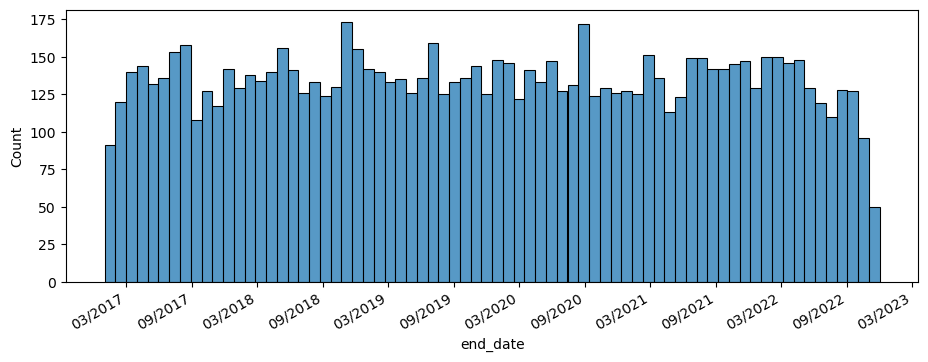

In [25]:
plt.figure(figsize=[11,4])

bins = np.arange(np.datetime64('2017-01-01'), np.datetime64('2022-12-31'), 30)

ax = sns.histplot(data=df, x='end_date', bins=date2num(bins))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gcf().autofmt_xdate()

In [26]:
df

,added_date,estimated_duration,start_date,end_date,real_duration,returns,software,dev,squad,client,status,end_date_month,end_year
0,2016-10-07,20,2017-01-03,2017-01-27,19,0,G,Ana Clara,Kappa,Rezende,Concluído,1,2017
1,2016-10-11,5,2017-01-05,2017-01-09,3,0,E,Helena,Kappa,Nogueira,Concluído,1,2017
2,2016-10-11,1,2017-01-06,2017-01-06,1,0,A,Brenda,Epsilon,Costa S/A,Concluído,1,2017
3,2016-10-14,17,2017-01-02,2017-01-23,16,0,E,Helena,Kappa,Araújo,Concluído,1,2017
4,2016-10-14,12,2017-01-10,2017-01-20,9,2,D,Emanuelly,Theta,Nogueira,Concluído,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-12-22,4,NaT,NaT,<NA>,<NA>,E,NaN,Kappa,das Neves,Não Iniciado,<NA>,<NA>
9996,2022-12-22,7,NaT,NaT,<NA>,<NA>,F,NaN,Theta,Cunha S/A,Não Iniciado,<NA>,<NA>
9997,2022-12-23,18,NaT,NaT,<NA>,<NA>,F,NaN,Zeta,Araújo,Não Iniciado,<NA>,<NA>
9998,2022-12-27,15,2022-12-30,2023-01-10,8,1,G,Brenda,Kappa,Barbosa - ME,Em Homologação,1,2023


In [52]:
df['end_date'] = pd.to_datetime(df['end_date']).dt.date

In [53]:
df[df['end_date'] > datetime.date.today() - datetime.timedelta(days=84)]

,added_date,estimated_duration,start_date,end_date,real_duration,returns,software,dev,squad,client,status,end_date_month,end_year
8948,2022-03-23,19,2022-06-16,2022-07-13,20,0,B,Emanuelly,Epsilon,Castro - ME,Concluído,7,2022
9025,2022-04-08,19,2022-06-24,2022-07-15,16,0,E,Valentina,Kappa,Campos Rezende - ME,Concluído,7,2022
9033,2022-04-11,17,2022-07-05,2022-07-15,9,0,E,Valentina,Theta,Correia,Concluído,7,2022
9035,2022-04-11,10,2022-07-06,2022-07-15,8,0,E,Valentina,Epsilon,Freitas,Concluído,7,2022
9045,2022-04-14,17,2022-07-11,2022-07-26,12,0,F,Brenda,Chi,da Conceição - EI,Concluído,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,2022-12-07,7,2022-12-29,2022-12-30,2,0,E,Lara,Theta,Rezende,Em Homologação,12,2022
9985,2022-12-12,20,2022-12-20,2023-01-13,19,1,G,Valentina,Kappa,Cavalcanti e Filhos,Em Homologação,1,2023
9993,2022-12-20,2,2022-12-23,2022-12-23,1,2,C,Mirella,Theta,Moura,Concluído,12,2022
9998,2022-12-27,15,2022-12-30,2023-01-10,8,1,G,Brenda,Kappa,Barbosa - ME,Em Homologação,1,2023


In [59]:
hovertemplate_here = (
"<i>End Date</i>: %{x}<br>"+
"<extra></extra>")

fig = px.histogram(df[df['end_date'] > datetime.date.today() - datetime.timedelta(days=84)], 
                   x='end_date', 
                   template="simple_white", 
                   nbins=7)
fig.update_layout(bargap=0.2, yaxis_title="# de Tickets",
                  xaxis_title="Data de Término",
                 title={
                     'text': "Quantidade de Tickets Fechados",
                     'y': 0.9,
                     'x': 0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'
                 })
fig.update_traces(hovertemplate='Data de Término: %{x} <br># Tickets: %{y}')
fig.show()

In [37]:
fig = px.bar(df, x='end_date', template="simple_white")
fig.update_layout(bargap=0.2, yaxis_title="# de Tickets",
                  xaxis_title="Data de Término",
                 title={
                     'text': "Quantidade de Tickets Fechados",
                     'y': 0.9,
                     'x': 0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'
                 })
fig.show()

In [28]:
# df.groupby(pd.Grouper(key='end_date', axis=0, freq='M')).count()

In [29]:
df.groupby('end_date').agg(sum).astype('Int64')

,estimated_duration,real_duration,returns,end_date_month,end_year
end_date,,,,,
2017-01-05,2,2,0,1,2017
2017-01-06,24,18,7,8,16136
2017-01-09,5,3,0,1,2017
2017-01-10,19,14,4,2,4034
2017-01-11,16,9,0,2,4034
...,...,...,...,...,...
2023-01-04,5,4,2,1,2023
2023-01-05,15,9,1,1,2023
2023-01-10,50,34,1,3,6069
